# LAT Temperature History

#### Long-term monitoring of temperatures in the LAT on Fermi

#### Robert Cameron
#### November 2019

In [1]:
#from astropy.io import ascii
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib.dates import (WEEKLY, MONTHLY, YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import datetime as dt
plt.rc('font', size = 16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rcParams['lines.linewidth'] = 2
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Set of LAT temperatures to be plotted

ACDtemp = 'LHKP0ACDSHT0'
CALtemp = 'LHKT3CALAF1T1'
TKRtemp = 'LHKT3TKRC0T0'
RITtemp = 'LTC00RITTEMP'
GASUtemp = 'L_DAQ_P_GASU_T'
XLPtemp = 'L_MCH_XLPLT_5T'

# read ASCII text data file, containing time and Mean, RMS, Min, Max for each LAT temperature
# 10-year data file
#file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/10yearLAT/LATtemps.txt"
#cols = ['year','month','day','hour','minute','second','ACD','As','Ab','At','CAL','Cs','Cb','Ct','TKR','Ts','Tb','Tt','RIT','Rs','Rb','Rt','GASU','Gs','Gb','Gt','XLP','Xs','Xb','Xt']
#f = pd.read_csv(file,names=cols,skiprows=1,skip_blank_lines=1,delim_whitespace=True)
#ymd = pd.to_datetime(f[['year', 'month', 'day','hour','minute','second']])

# full mission data file
file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/10yearLAT/full-mission/temp-data-1000.csv"
file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/10yearLAT/full-mission/temp-data-10year.csv"
cols = ['time','ACD','As','Ab','At','CAL','Cs','Cb','Ct','TKR','Ts','Tb','Tt','RIT','Rs','Rb','Rt','GASU','Gs','Gb','Gt','XLP','Xs','Xb','Xt']
f = pd.read_csv(file,names=cols,skiprows=6,skip_blank_lines=1)
ymd = pd.to_datetime(f['time'])

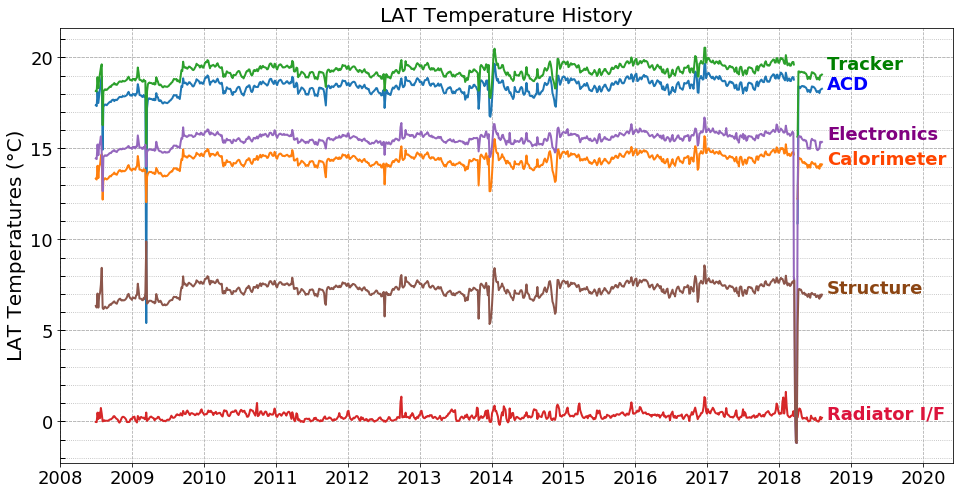

In [11]:
fig = plt.figure(figsize = [16,8])
ax = fig.add_subplot(111)
#ax.set_ylim(0,110)
ax.set_xlim([dt.date(2008, 1, 1), dt.date(2020, 6, 1)])
dtext = dt.date(2020,4,1)
#ax.plot(ymd,f['ACD'],label='ACD',color='r')
#ax.plot(ymd,f['CAL'],label='CAL',color='b')
#ax.plot(ymd,f['TKR'],label='CAL',color='b')
#ax.plot(ymd,f['RIT'],label='RIT',color='b')
#ax.plot(ymd,f['GASU'],label='GASU',color='b')
#ax.plot(ymd,f['XLP'],label='XLP',color='b')
ax.plot(ymd,f['ACD'],label='ACD')
ax.plot(ymd,f['CAL'],label='Calorimeter')
ax.plot(ymd,f['TKR'],label='Tracker')
ax.plot(ymd,f['RIT'],label='Radiator Interface')
ax.plot(ymd,f['GASU'],label='Electronics')
ax.plot(ymd,f['XLP'],label='Structure')
dtext = dt.date(2018,9,1)
tsize = 18
plt.text(dtext,19.3,'Tracker',color='g',size=tsize,weight='bold')
plt.text(dtext,18.2,'ACD',color='b',size=tsize,weight='bold')
plt.text(dtext,15.5,'Electronics',color='purple',size=tsize,weight='bold')
plt.text(dtext,14.1,'Calorimeter',color='orangered',size=tsize,weight='bold')
plt.text(dtext,7,'Structure',color='saddlebrown',size=tsize,weight='bold')
plt.text(dtext,0.1,'Radiator I/F',color='crimson',size=tsize,weight='bold')

#ax.legend()
#plt.xlabel("Time")
plt.ylabel("LAT Temperatures (\u00B0C)",size=20)
plt.title("LAT Temperature History",size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# set Major and Minor ticks on the time axis

#plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,10,20)))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator((0,5,10,15,20,25,30)))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
#plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

locator = mdates.AutoDateLocator(minticks=3, maxticks=17)
ax.xaxis.set_major_locator(locator)
#plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=10))
ax.yaxis.set_minor_locator(MultipleLocator(1))
#formatter = mdates.ConciseDateFormatter(locator)    ##### does not exist in my version of Matplotlib!!!
#ax.xaxis.set_major_formatter(formatter)

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b-%d"))
#ax.grid(which='major', color='#CCCCCC', linestyle='--')
#ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.grid(which='major', linestyle='--')
ax.grid(which='minor', linestyle=':')

#plt.gcf().autofmt_xdate()

ax.tick_params(which='minor', length=5, width=1, direction='in')

plotfile = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/10yearLAT/full-mission/LATtemphistory.png"
plt.savefig(plotfile)

plt.show()